In [50]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\padgi'

In [4]:
df=pd.read_csv("C:\\Users\\padgi\\heart_failure_clinical_records1.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.shape

(918, 12)

In [10]:
df.describe().T              #It shows described data in table format

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.isnull().sum()                    #Null value

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64

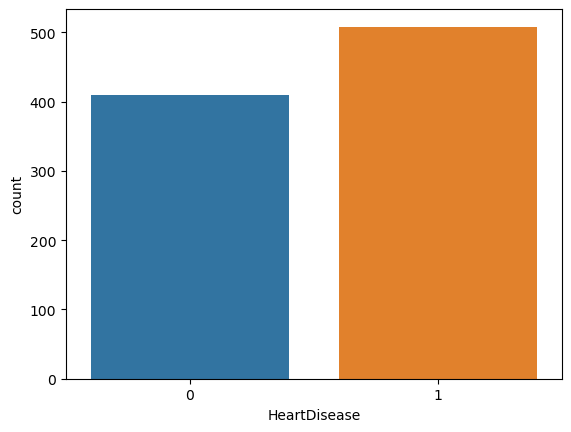

In [12]:
sns.countplot(x = "HeartDisease", data = df)
df.loc[:, 'HeartDisease'].value_counts()

<Axes: >

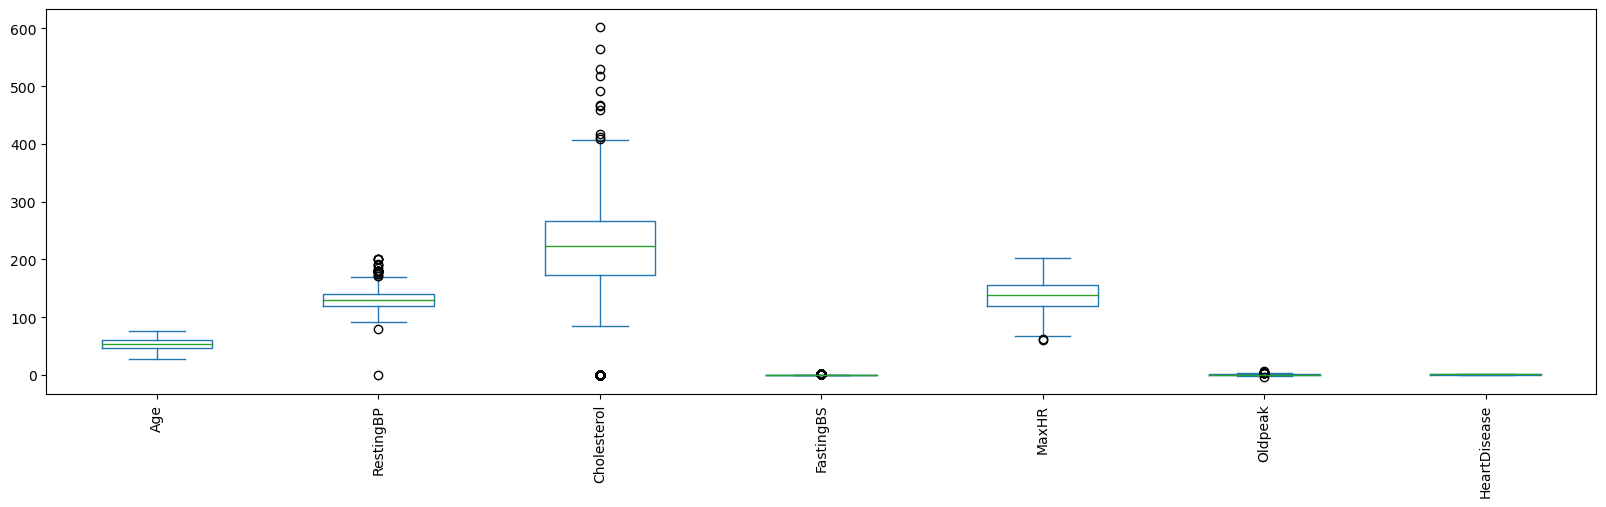

In [15]:
# Boxplotting of data
df.plot.box(figsize=(20,5), rot=90)

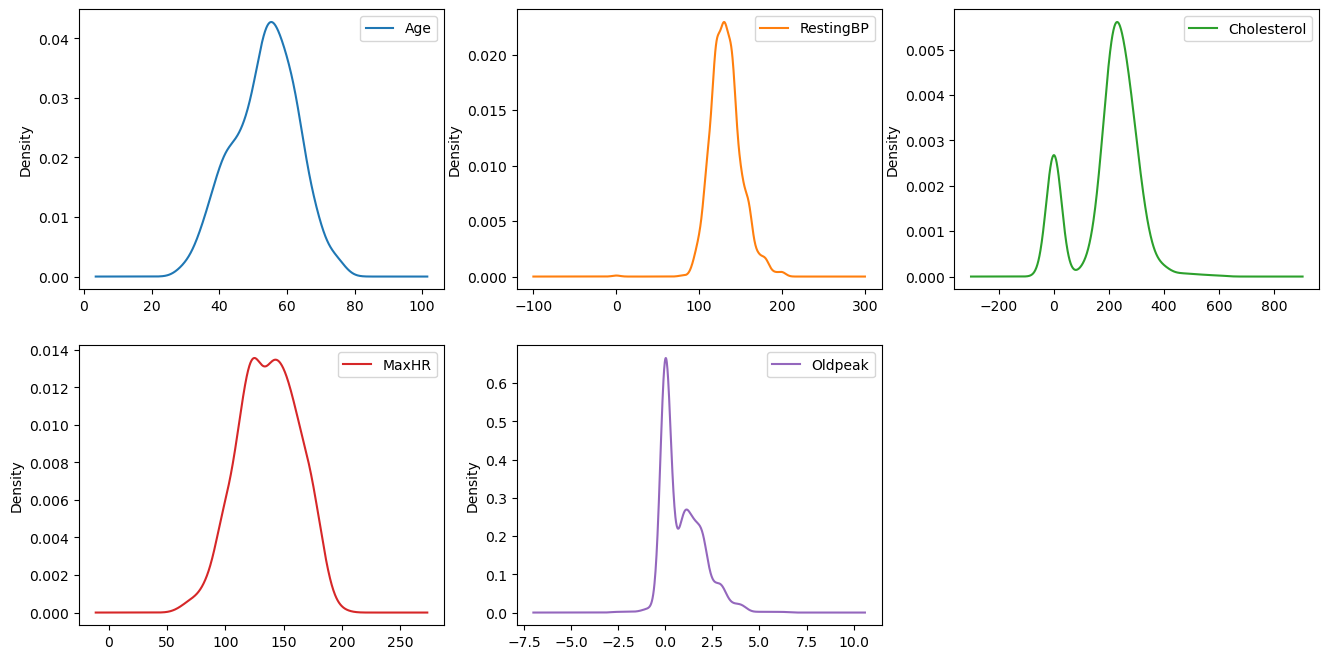

In [16]:
df[final_numeric_feature].plot(kind='density', subplots=True, layout=(2,3), sharex=False, figsize= (16,8))
plt.show()

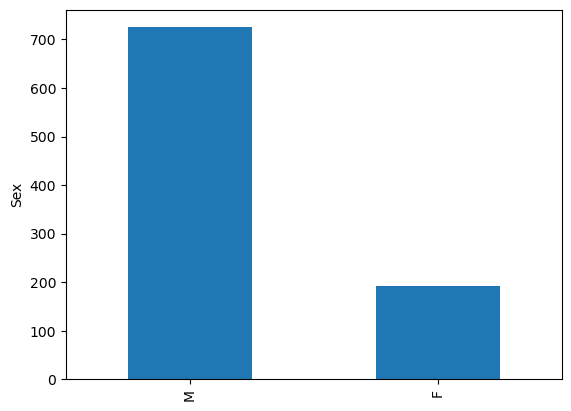

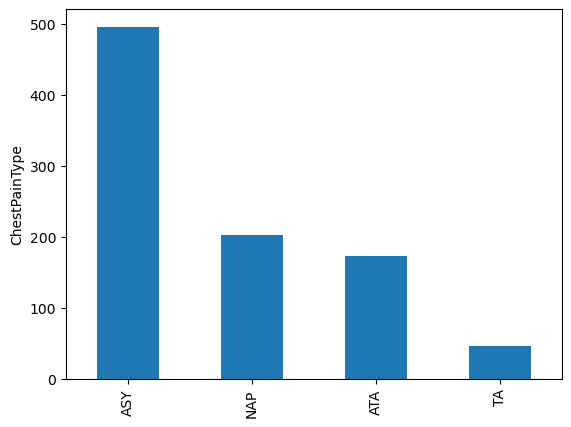

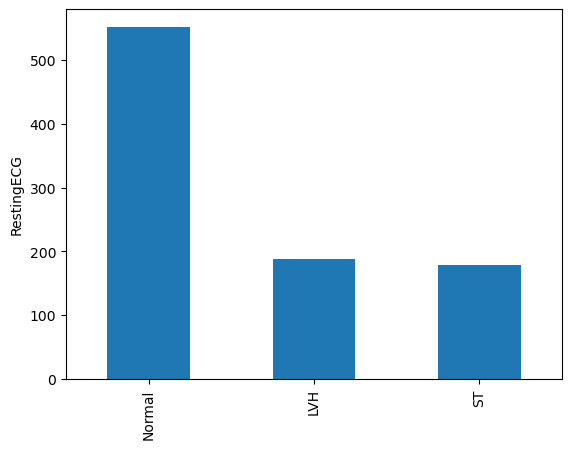

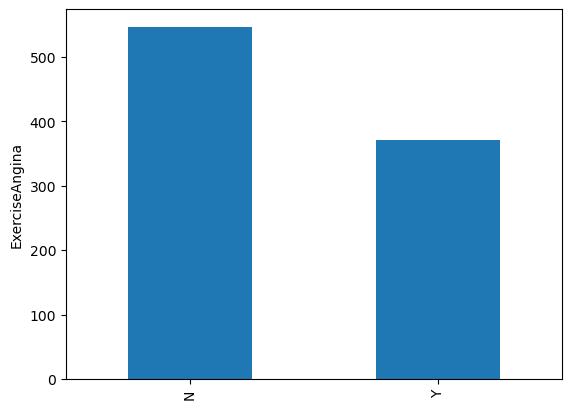

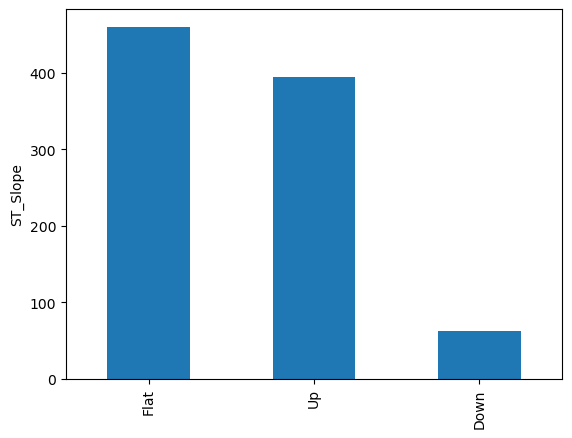

In [17]:
for i in range(len(final_categorical_feature)):
    df[final_categorical_feature[i]].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(final_categorical_feature[i])
    plt.show()

In [19]:
#Outliers
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ---------------------------------------------------------
def outlier_detect_normal(df, col):
    m = df[col].mean()
    s = df[col].std()
    return df[((df[col]-m)/s).abs()>3]

# ---------------------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ---------------------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ---------------------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
    print('outlier replace with upper bound - {}' .format(col)) 
    
# ---------------------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)
    print('outlier replace with lower bound - {}' .format(col)) 

# ---------------------------------------------------------
def preprocess(df, col):
    print("*********************** {} ***********************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0])))
    print("Z_Score => {}: {}".format(final_numeric_feature[i],(outlier_detect_normal(df[final_numeric_feature],final_numeric_feature[i]).shape[0])))
    print("-------------------------------------")

IQR => Age: 0
Z_Score => Age: 0
-------------------------------------
IQR => RestingBP: 28
Z_Score => RestingBP: 8
-------------------------------------
IQR => Cholesterol: 183
Z_Score => Cholesterol: 3
-------------------------------------
IQR => MaxHR: 2
Z_Score => MaxHR: 1
-------------------------------------
IQR => Oldpeak: 16
Z_Score => Oldpeak: 7
-------------------------------------


*********************** Age ***********************

lower outlier: 0 ****** upper outlier: 0



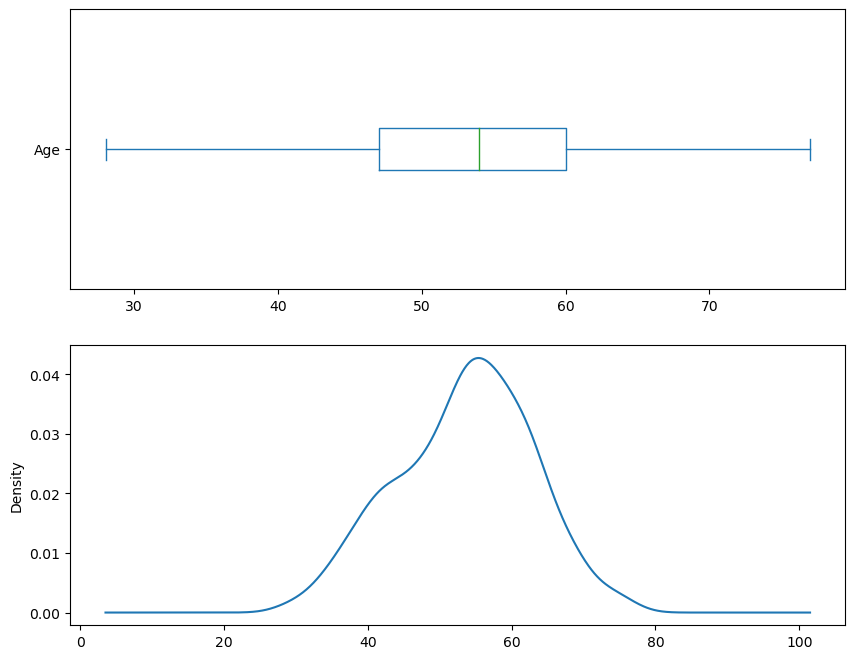

*********************** RestingBP ***********************

lower outlier: 2 ****** upper outlier: 26



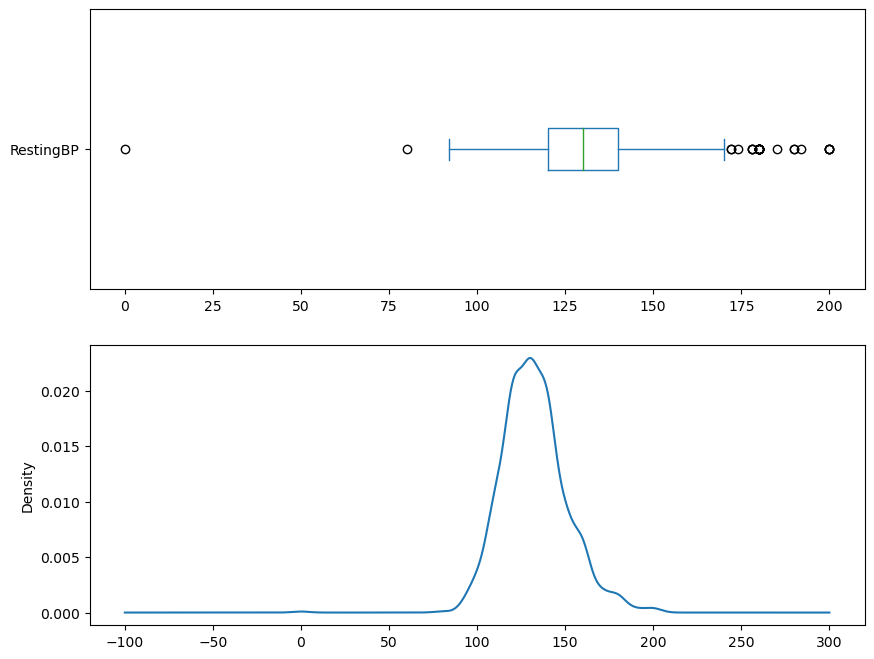

*********************** Cholesterol ***********************

lower outlier: 172 ****** upper outlier: 11



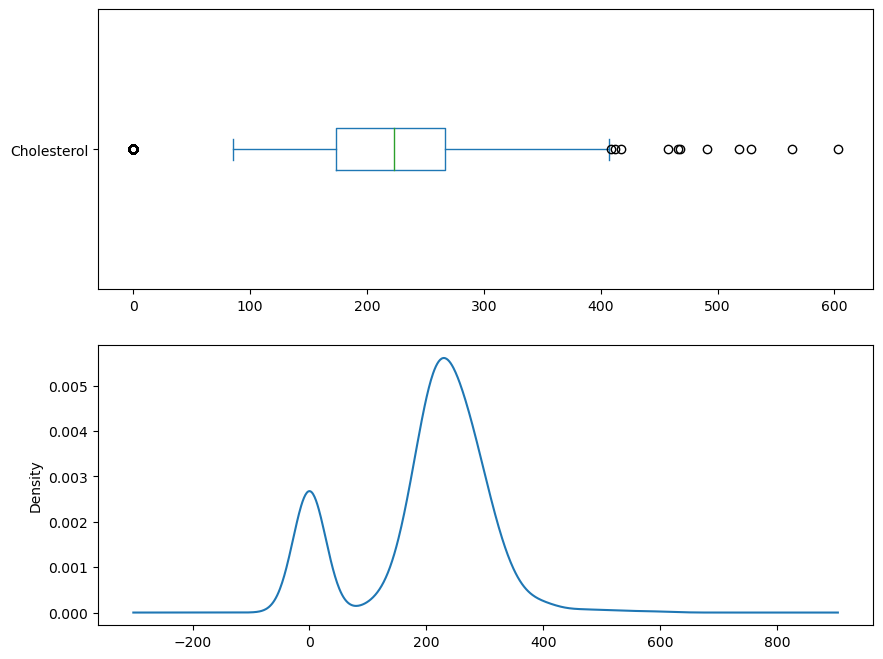

*********************** MaxHR ***********************

lower outlier: 2 ****** upper outlier: 0



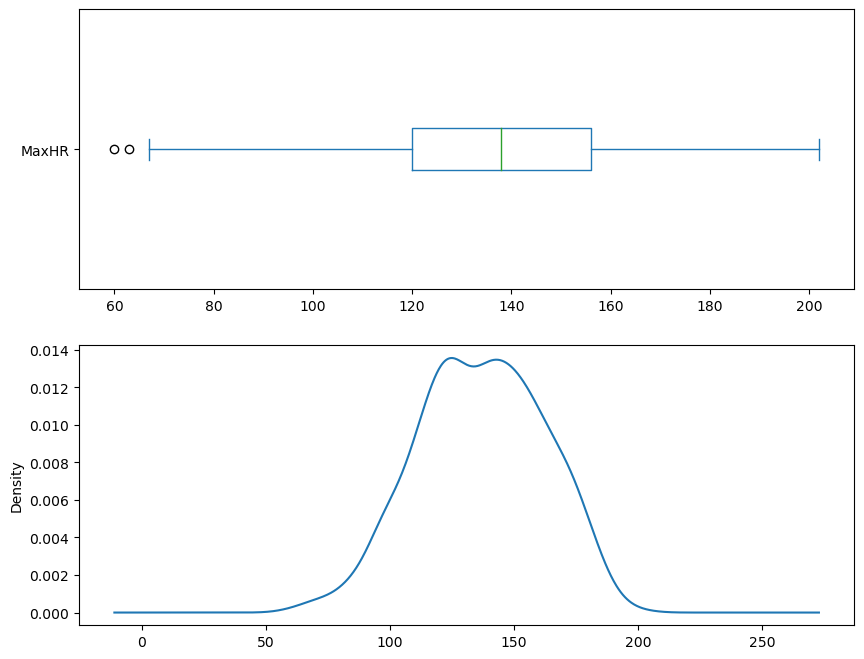

*********************** Oldpeak ***********************

lower outlier: 1 ****** upper outlier: 15



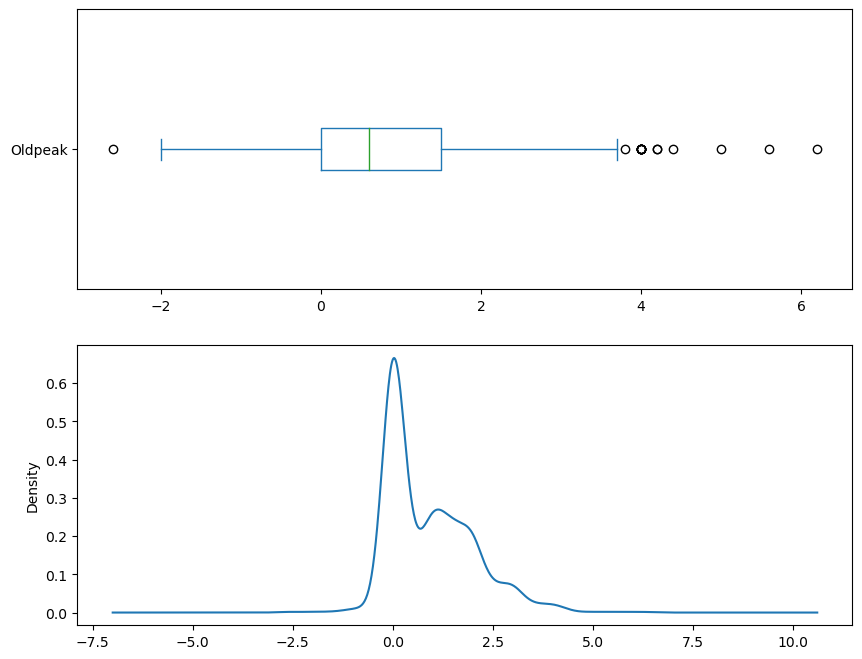

In [22]:
# PREPROCESSING OF DATE
for i in range(len(final_numeric_feature)):
    preprocess(df[final_numeric_feature], final_numeric_feature[i])

In [23]:
outlier = []
for i in range(len(final_numeric_feature)):
    if outlier_detect(df[final_numeric_feature],final_numeric_feature[i]).shape[0] !=0:
        outlier.append(final_numeric_feature[i])

outlier

['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [26]:
for i in range(len(outlier)):
    replace_upper(df, outlier[i]) 
    
print("\n---------------------------------\n")
for i in range(len(outlier)):
    replace_lower(df, outlier[i])

outlier replace with upper bound - RestingBP
outlier replace with upper bound - Cholesterol
outlier replace with upper bound - MaxHR
outlier replace with upper bound - Oldpeak

---------------------------------

outlier replace with lower bound - RestingBP
outlier replace with lower bound - Cholesterol
outlier replace with lower bound - MaxHR
outlier replace with lower bound - Oldpeak


In [25]:
for i in range(len(final_numeric_feature)):
    print("IQR => {}: {}".format(final_numeric_feature[i],(outlier_detect(df,final_numeric_feature[i]).shape[0])))
    print("Z_Score => {}: {}".format(final_numeric_feature[i],(outlier_detect_normal(df,final_numeric_feature[i]).shape[0])))
    print("----------------------------------")

IQR => Age: 0
Z_Score => Age: 0
----------------------------------
IQR => RestingBP: 0
Z_Score => RestingBP: 0
----------------------------------
IQR => Cholesterol: 0
Z_Score => Cholesterol: 0
----------------------------------
IQR => MaxHR: 0
Z_Score => MaxHR: 0
----------------------------------
IQR => Oldpeak: 0
Z_Score => Oldpeak: 1
----------------------------------


# 


In [49]:
df.loc[df.duplicated()].shape

(0, 12)

In [51]:
le = LabelEncoder() 
df[final_categorical_feature] = df[final_categorical_feature].apply(lambda col: le.fit_transform(col)) 
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [53]:

#

x = df.drop("HeartDisease", axis = 1)
y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.3)
print(y_train.value_counts())

1    355
0    287
Name: HeartDisease, dtype: int64


In [56]:
pd.DataFrame(abs(df.corr()['HeartDisease']))

,HeartDisease
Age,0.282039
Sex,0.305445
ChestPainType,0.386828
RestingBP,0.113191
Cholesterol,0.225304
FastingBS,0.267291
RestingECG,0.057384
MaxHR,0.400519
ExerciseAngina,0.494282
Oldpeak,0.410211


In [57]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int32(5), int64(5)
memory usage: 68.3 KB


<Axes: >

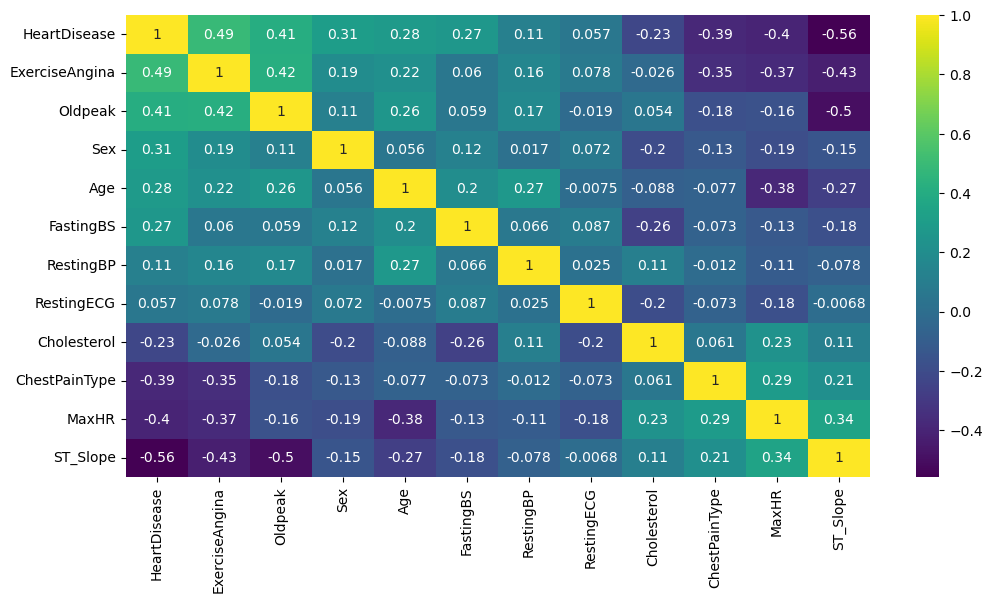

In [59]:
total_count = 12
cols = df.corr().nlargest(total_count, 'HeartDisease')['HeartDisease'].index
corr_matrix = df[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'viridis')

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [63]:
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns[:])
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns[:])
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.464714,0.544949,-0.800573,-1.938794,0.279074,-0.525682,0.012310,0.774609,-0.830346,-0.748908,1.066187
1,0.781767,0.544949,-0.800573,-1.346190,-1.861347,1.902289,0.012310,-1.173673,1.204318,1.045471,-2.297410
2,-0.063707,0.544949,1.345430,1.616831,-1.861347,1.902289,-1.568333,-0.605424,1.204318,-0.843349,-0.615612
3,0.993136,0.544949,-0.800573,1.616831,0.236558,1.902289,0.012310,-1.295440,1.204318,0.101061,-0.615612
4,0.993136,0.544949,-0.800573,-0.160982,1.299461,1.902289,-1.568333,-0.199532,1.204318,0.856589,1.066187


In [62]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

# LogisticRegression  


In [67]:
from sklearn.linear_model import LogisticRegression  

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

accuracy_score(y_test,y_pred)

0.8586956521739131

# Accuracy score 
confusion matrix


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Accuracy score Confusion Matrix')
print('------------------------')
print('')
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.92      0.84      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276


------------------------
Accuracy score Confusion Matrix
------------------------

[[100  12]
 [ 27 137]]


# DecisionTreeClassifier 
# Modeling with tuned hyperparameters

In [69]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=4,criterion='entropy')

DT.fit(X_train,y_train)

print("DT training score :",DT.score(X_train,y_train))
print("DT testing score :",DT.score(X_test,y_test))

DT training score : 0.8644859813084113
DT testing score : 0.8478260869565217


# RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=8)

RF.fit(X_train,y_train)

print("RF training score :",RF.score(X_train,y_train))
print("RF testing score :",RF.score(X_test,y_test))

RF training score : 0.8987538940809969
RF testing score : 0.8913043478260869


# GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier( learning_rate=0.01,
    max_depth=2,
    max_features=0.5,
    min_samples_leaf=5,
    min_samples_split=5,
    n_estimators=1000,
    subsample=0.8,
    random_state=42)

GBC.fit(X_train,y_train)

print("GBC training score :",GBC.score(X_train,y_train))
print("GBC testing score :",GBC.score(X_test,y_test))

GBC training score : 0.9034267912772586
GBC testing score : 0.8913043478260869


In [72]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model = abc.fit(X_train, y_train)
y_pred_adaboost = model.predict(X_test)
from sklearn.metrics import accuracy_score

print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_adaboost))

AdaBoost Classifier Model Accuracy: 0.8659420289855072
